# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv]()

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
data = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




In [5]:
data %>% head

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [13]:
df_vacc_rates = 
data %>% filter(mmr >= 0) %>% 
group_by(state) %>%
summarize(vac_frac_above_95 =sum(mmr >= 95, na.rm = TRUE)/ n())

df_vacc_rates


state,vac_frac_above_95
<chr>,<dbl>
Arizona,0.506404782
Arkansas,0.003527337
California,0.888506151
Colorado,0.623092236
Connecticut,0.811544992
Illinois,0.896825397
Maine,0.473389356
Massachusetts,0.865828092
Minnesota,0.473948525


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [17]:
data %>% filter(mmr >= 0) %>% 
group_by(state) %>%
summarize(vac_frac_above_95 =sum(mmr >= 95, na.rm = TRUE)/ n())%>%
arrange(vac_frac_above_95) %>%
head(1)

state,vac_frac_above_95
<chr>,<dbl>
Arkansas,0.003527337


Make a ECDF plot of the school vaccination rates in North Carolina. Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

In [4]:
nc_vac_rates = data %>% filter(state == "North Carolina") %>%
arrange(overall) %>% 
mutate(rk = row_number())%>% 
mutate(rk = rk/2084)



nc_vac_rates

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,rk
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1767,North Carolina,2018-19,Renaissance Montessori Sch. of Cary,NA,NA,Wake,NA,4,-1,-1.0,NA,NA,NA,35.76823,-78.74369,0.0004798464
1766,North Carolina,2018-19,Annunciation Catholic,NA,NA,Craven,NA,23,-1,21.7,NA,NA,NA,34.87682,-76.90448,0.0009596929
1765,North Carolina,2018-19,Starmount Acad of Excellence,NA,NA,Mecklenburg,NA,77,-1,40.3,NA,NA,NA,35.13929,-80.87051,0.0014395393
1764,North Carolina,2018-19,Spruce Pine Montessori,NA,NA,Mitchell,NA,7,-1,42.9,NA,NA,NA,35.91674,-82.06719,0.0019193858
1763,North Carolina,2018-19,Moyock Elementary,NA,NA,Currituck,NA,85,-1,43.5,NA,NA,NA,36.52490,-76.17366,0.0023992322
1762,North Carolina,2018-19,Liberty Christian,NA,NA,Durham,NA,20,-1,45.0,NA,5.0,NA,36.06362,-78.92544,0.0028790787
1761,North Carolina,2018-19,Nations Ford Elementary,NA,NA,Mecklenburg,NA,117,-1,45.3,NA,0.9,NA,35.15489,-80.90022,0.0033589251
1760,North Carolina,2018-19,Riverside Christian Academy,NA,NA,Cumberland,NA,13,-1,46.2,NA,NA,NA,34.62371,-79.15916,0.0038387716
1760,North Carolina,2018-19,Riverside Christian Academy,NA,NA,Cumberland,NA,13,-1,46.2,NA,NA,NA,35.05898,-78.84862,0.0043186180


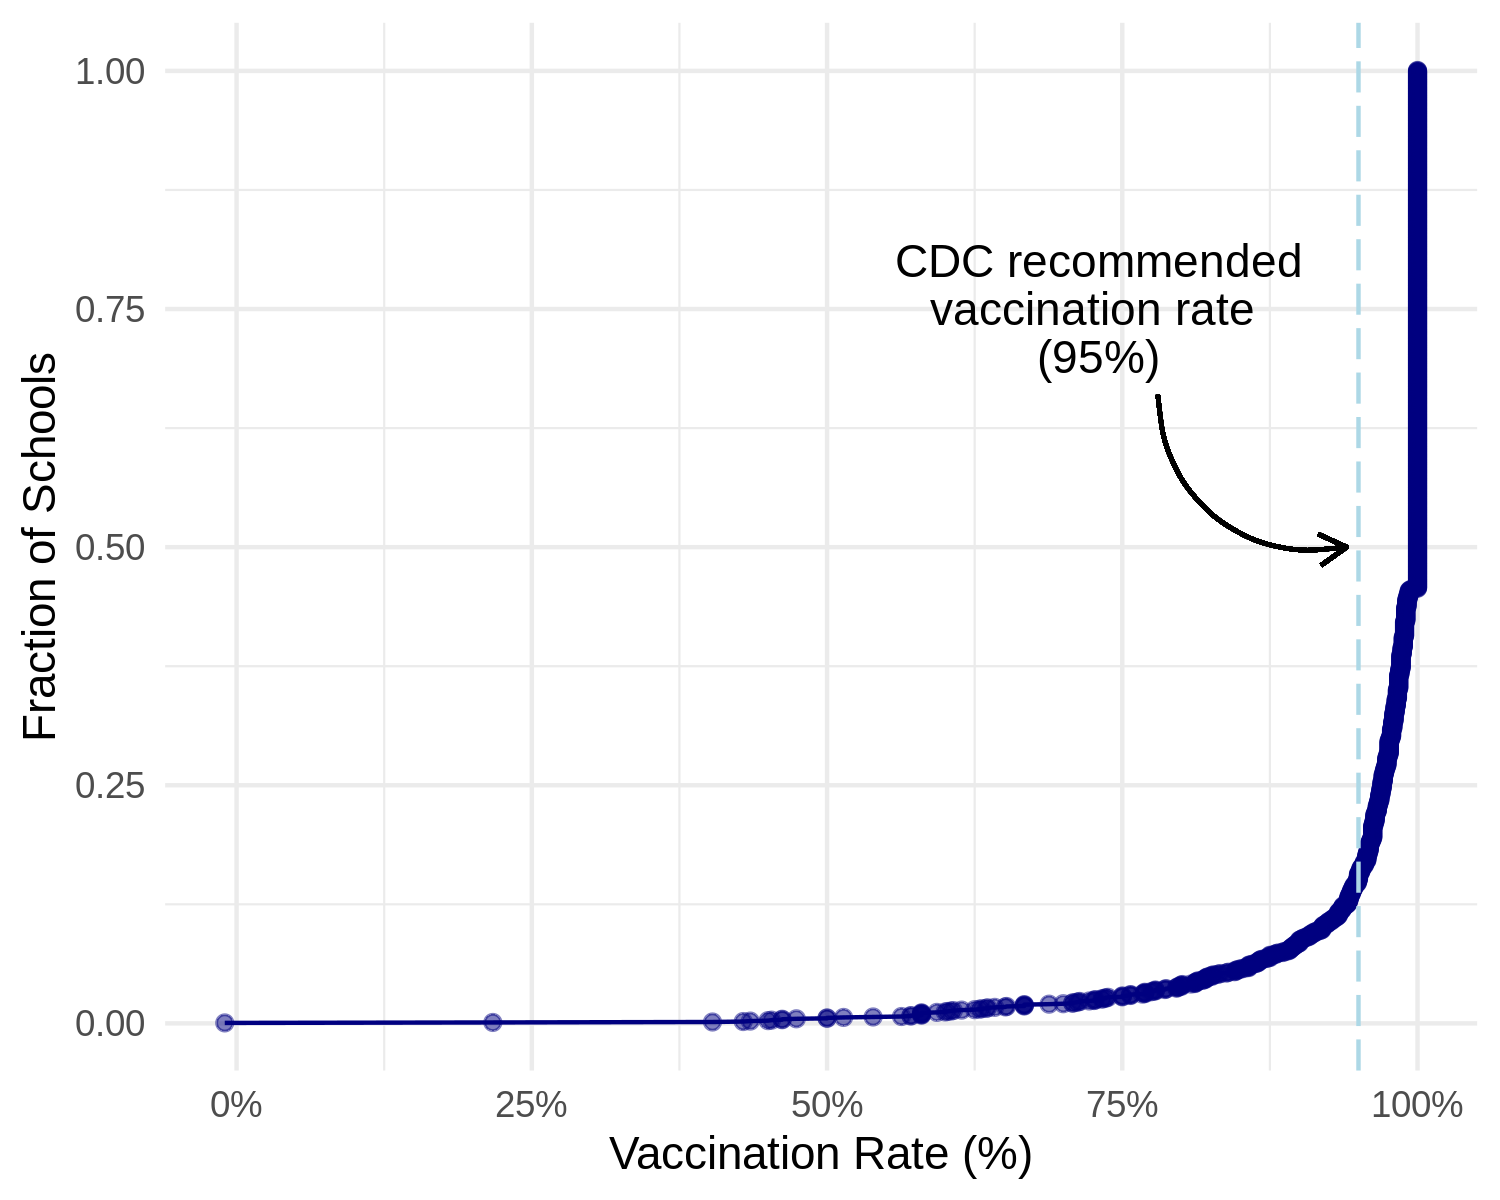

In [20]:
p = ggplot(nc_vac_rates, aes (x = overall, y = rk))+ 
geom_point(color = "navy", alpha = 0.5)+
geom_line(color = "navy")+
theme_minimal()+
geom_vline(xintercept = 95, linetype = "longdash", color = "light blue")+
labs(x = 'Vaccination Rate (%)', y = 'Fraction of Schools')+
scale_x_continuous(limits = c(-1, 100), labels = function(x) paste0(x, '%'))+
geom_curve(
    aes(x = 78, y = 0.66, xend = 94, yend = 0.50), 
    arrow = arrow(length = unit(0.03, "npc")))+
annotate('text', x = 73, y = 0.80, label = 'CDC recommended')+
annotate('text', x = 73, y = 0.75, label = 'vaccination rate ')+
annotate('text', x = 73, y = 0.70, label = '(95%)')
                   



p


(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [29]:
data %>% 
filter(state == "North Carolina") %>%
summarize(median(overall))


median(overall)
<dbl>
100


The median vaccination rate in NC 100%, which is above the CDC recommended target of 95%.